4) Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing
Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains
information about various houses in Boston through different parameters. There are 506 samples and
14 feature variables in this dataset.


In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
df=pd.read_csv("BostonHousing.csv",delimiter=',')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [87]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [88]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [89]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [90]:
df.shape

(506, 14)

In [91]:
df['rm'].fillna(df['rm'].mean(), inplace=True)
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [92]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [103]:
df['price']=df['medv']


KeyError: 'medv'

In [ ]:
df.drop(['medv'],axis=1,inplace=True)

In [104]:
corr=df.corr()
corr

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219261,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.310847,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.392052,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091434,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302051,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219261,0.310847,-0.392052,0.091434,-0.302051,1.000000,-0.239632,0.202268,-0.210353,-0.292178,-0.356065,0.127998,-0.614526,0.695375
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.239632,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.202268,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.210353,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292178,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

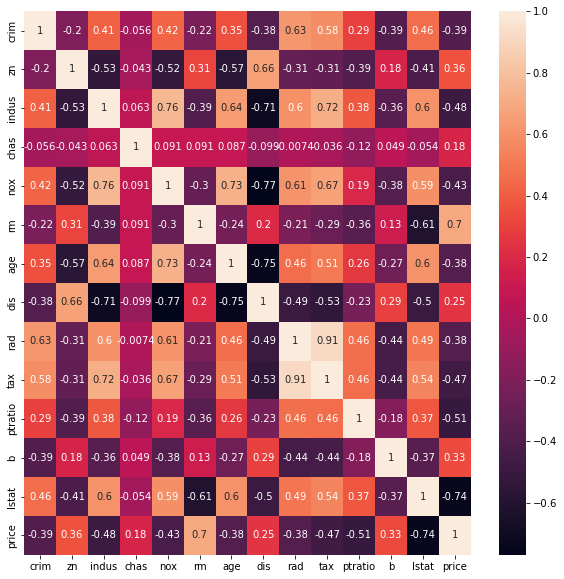

In [105]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)


In [107]:
X=df.drop(['price'],axis=1)
Y=df['price']

In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=13)

In [137]:
X_train.shape


(404, 13)

In [138]:
LinearReg=LinearRegression()
LinearReg.fit(X_train,Y_train)

LinearRegression()

In [139]:
LinearReg.coef_

array([-1.53885387e-01,  5.76549654e-02, -6.54913307e-03,  2.48914304e+00,
       -1.48836559e+01,  3.52565940e+00,  2.68927206e-03, -1.57684397e+00,
        3.67565202e-01, -1.49381965e-02, -8.90617684e-01,  7.39531248e-03,
       -5.59068462e-01])

In [140]:
LinearReg.intercept_

37.62033874552898

In [141]:
Y_test_prd=LinearReg.predict(X_test)

In [142]:
Y_test_prd

array([11.24100771, 19.66345331, 20.7816849 , 30.01232657, 23.34806791,
       22.30779212, 21.88993216, 20.61251452, 19.32300702,  0.36776766,
       18.93752889, 18.98769978, 36.29806283, 10.73109617, 15.32873213,
       18.78861848, 17.06269387, 20.88442297, 30.52303087, 21.66637058,
       36.15994086, 30.50191161, 22.89342296, 14.34140381, 18.35777234,
        6.67631094, 34.8221076 , 16.81097372, 14.40726866, 19.70652591,
       29.10765147,  5.01343202, -5.40488974, 20.62554422, 20.700854  ,
       14.9609    , 19.51071249, 16.69411269, 34.61956472, 16.61183315,
       16.42511621, 20.81272602, 36.32984389, 12.53245818, 15.64954207,
       35.71452483, 14.7350317 ,  3.23972665, 21.63061243, 20.52806809,
       35.59457718, 10.50547882, 39.78139238, 17.11645706, 22.08295706,
       20.04764488, 20.76620251, 32.47337455, 32.92679004, 23.41465943,
       21.90218792, 13.0462868 , 21.1826768 , 20.19644265, 22.2739669 ,
       30.1723847 , 27.74767611, 16.53276611, 17.86187803, 20.41

In [146]:
R2=r2_score(Y_test,Y_test_prd)
R2

0.7301285235967294

In [147]:
MAE=mean_absolute_error(Y_test,Y_test_prd)
MAE

3.63898192926726

In [148]:
MSE=mean_squared_error(Y_test,Y_test_prd)
MSE

24.46675556435096

In [149]:
RMSE=np.sqrt(MSE)
RMSE

4.946388133209015

In [150]:


LinearReg.score(X_test,Y_test)

0.7301285235967294

In [151]:

LinearReg.score(X_test,Y_test_prd)

1.0

Text(0, 0.5, 'Y_test')

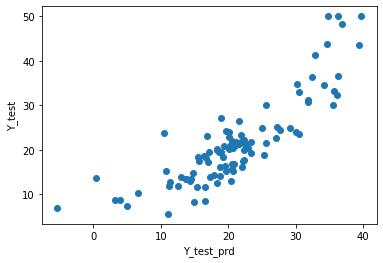

In [157]:
plt.scatter(Y_test_prd,Y_test)
plt.xlabel("Y_test_prd")
plt.ylabel("Y_test")
